In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression, make_classification
from sklearn.linear_model import LinearRegression, LogisticRegression

In [30]:
x, y = make_regression(n_samples=50,n_features=1,noise=40,random_state=4)

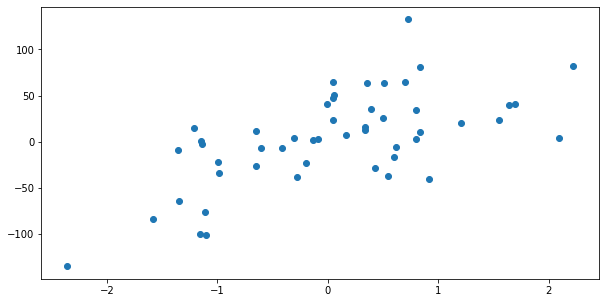

In [31]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)

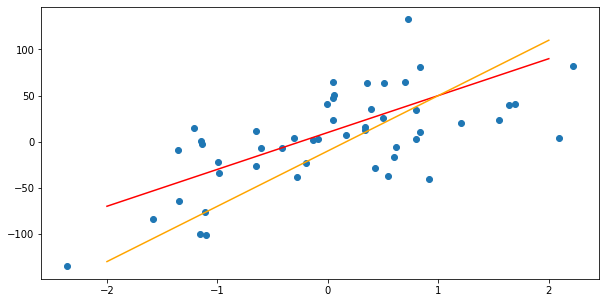

In [41]:
xx = np.linspace(-2,2,50)
yy = 40*xx + 10
yy2 = 60*xx - 10
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.plot(xx,yy,c='r')
plt.plot(xx,yy2,c='orange')

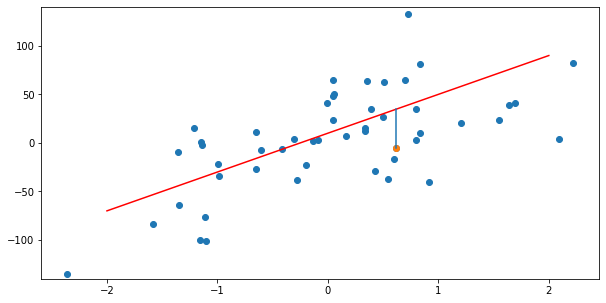

In [57]:
ymin = -140
ymax = 140
plt.figure(figsize=(10,5))
plt.ylim(ymin,ymax)
plt.scatter(x,y)
plt.plot(xx,yy,c='r')
plt.scatter(x[9],y[9])
plt.axvline(x[9],ymin=(y[9]-ymin)/(ymax-ymin), ymax=(40*x[9]+10-ymin)/(ymax-ymin))

In [2]:
def cost_function_example(x,y,coeff,intercept,fraction):
    ymin = min(y)-10
    ymax = max(y)+10
    yy = coeff*x + intercept
    points = np.random.choice(range(0,len(x)),int(fraction*len(x)),replace=False)
    
    plt.figure(figsize=(10,5))
    plt.ylim(ymin,ymax)
    plt.scatter(x,y)
    plt.plot(x,yy,c='r')
    for n in points:
        seg_min = min((y[n]-ymin)/(ymax-ymin),(coeff*x[n]+intercept-ymin)/(ymax-ymin))
        seg_max = max((y[n]-ymin)/(ymax-ymin),(coeff*x[n]+intercept-ymin)/(ymax-ymin))
        plt.axvline(x[n],ymin=seg_min, ymax=seg_max,c='purple')

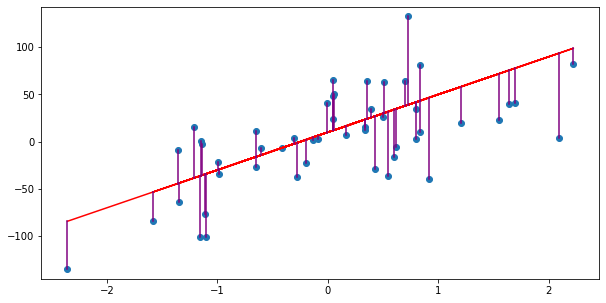

In [115]:
cost_function_example(x,y,40,10,1)

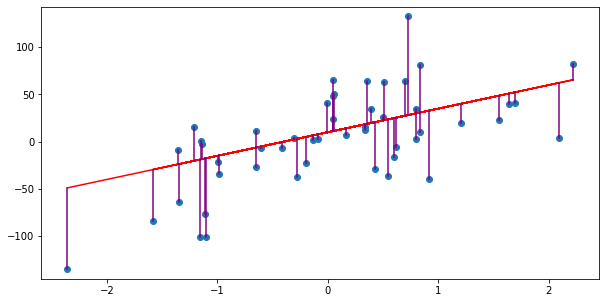

In [117]:
cost_function_example(x,y,25,10,1)

In [3]:
def cost_function_sse(x,y,coeff,intercept):
    ymin = min(y)-10
    ymax = max(y)+10
    yy = coeff*x + intercept
    
    plt.figure(figsize=(10,5))
    plt.ylim(ymin,ymax)
    plt.scatter(x,y)
    plt.plot(x,yy,c='r')
    sse = 0
    for n in range(0,len(x)):
        seg_min = min((y[n]-ymin)/(ymax-ymin),(coeff*x[n]+intercept-ymin)/(ymax-ymin))
        seg_max = max((y[n]-ymin)/(ymax-ymin),(coeff*x[n]+intercept-ymin)/(ymax-ymin))
        plt.axvline(x[n],ymin=seg_min, ymax=seg_max,c='purple')
        sse += (y[n]-(coeff*x[n]+intercept))**2
    plt.title(f'Sum of squared errors: {sse}')
    
    props = dict(boxstyle='round', facecolor='blue', alpha=0.2)
    plt.text(min(x), max(y), f'Coefficient: {coeff} \n Intercept: {intercept}',
             fontsize=14, verticalalignment='top',bbox=props)

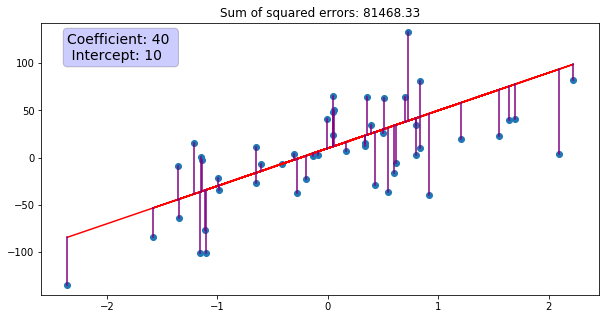

In [173]:
cost_function_sse(x,y,40,10)

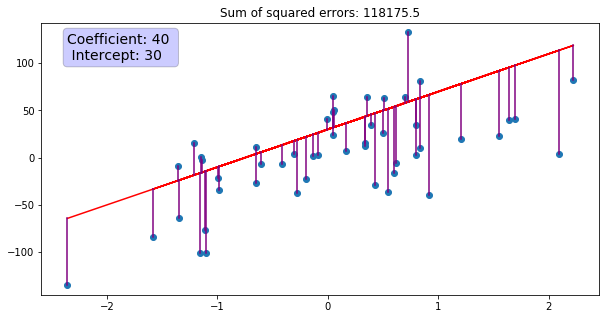

In [174]:
cost_function_sse(x,y,40,30)

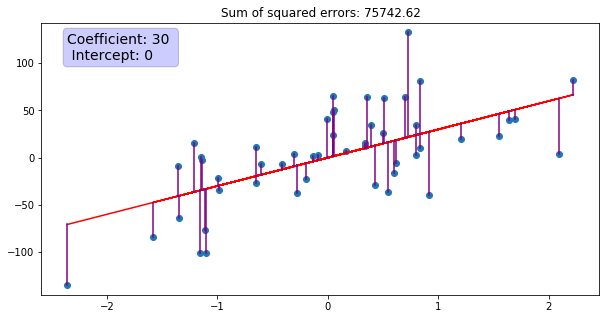

In [178]:
cost_function_sse(x,y,30,0)

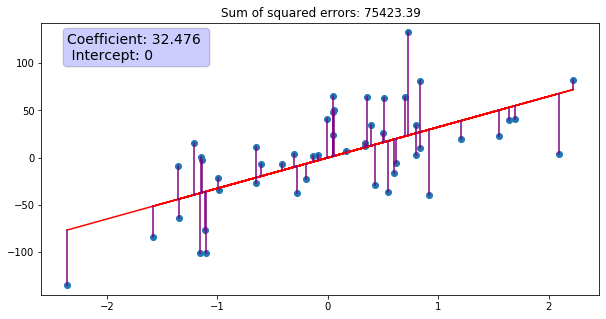

In [179]:
cost_function_sse(x,y,32.476,0)

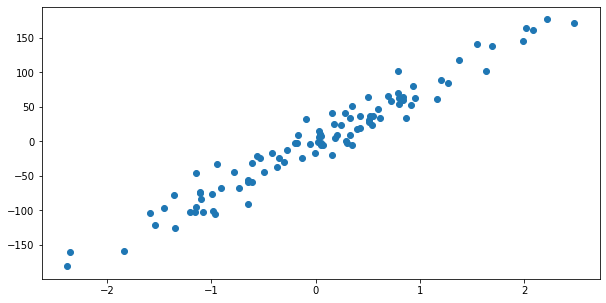

In [336]:
x2, y2 = make_regression(n_samples=100,n_features=1,noise=20,random_state=4)
plt.figure(figsize=(10,5))
plt.scatter(x2,y2)

In [337]:
lr.fit(x2,y2)
lr.coef_

array([74.93351199])

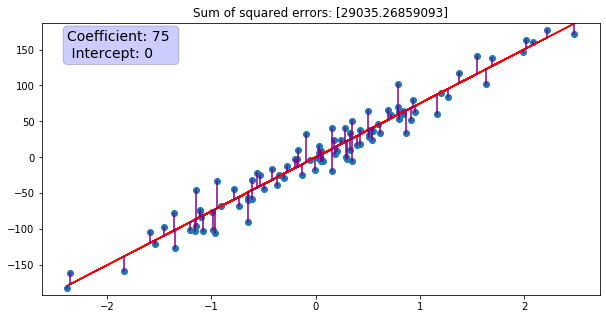

In [338]:
cost_function_sse(x2,y2,75,0)

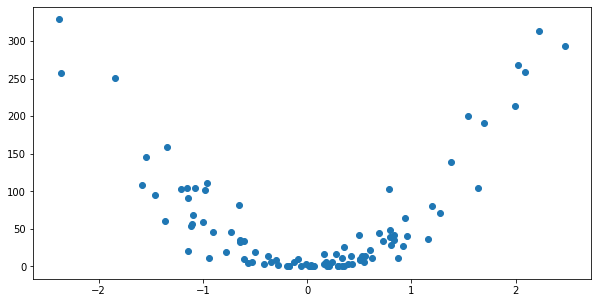

In [332]:
plt.figure(figsize=(10,5))
plt.scatter(x2,(y2/10)**2)

In [207]:
lr = LinearRegression()
lr.fit(x2**2,(y2/10)**2)
lr.coef_

array([55.61442467])

In [4]:
def cost_function_square(x,y,coeff,intercept):
    ymin = min(y)-10
    ymax = max(y)+10
    xx = np.linspace(min(x),max(x),100)
    yy = coeff*(xx**2) + intercept
    
    plt.figure(figsize=(10,5))
    plt.ylim(ymin,ymax)
    plt.scatter(x,y)
    plt.plot(xx,yy,c='r')
    sse = 0
    for n in range(0,len(x)):
        seg_min = min((y[n]-ymin)/(ymax-ymin),(coeff*x[n]**2+intercept-ymin)/(ymax-ymin))
        seg_max = max((y[n]-ymin)/(ymax-ymin),(coeff*x[n]**2+intercept-ymin)/(ymax-ymin))
        plt.axvline(x[n],ymin=seg_min, ymax=seg_max,c='purple')
        sse += (y[n]-(coeff*x[n]**2+intercept))**2
    plt.title(f'Sum of squared errors: {round(sse[0],2)}')
    
#     props = dict(boxstyle='round', facecolor='blue', alpha=0.2)
#     plt.text(min(x), max(y), f'Coefficient: {coeff} \n Intercept: {intercept}',
#              fontsize=14, verticalalignment='top',bbox=props)

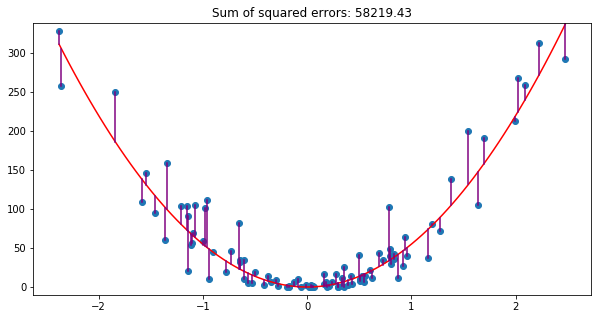

In [334]:
cost_function_square(x2,(y2/10)**2,55,0)

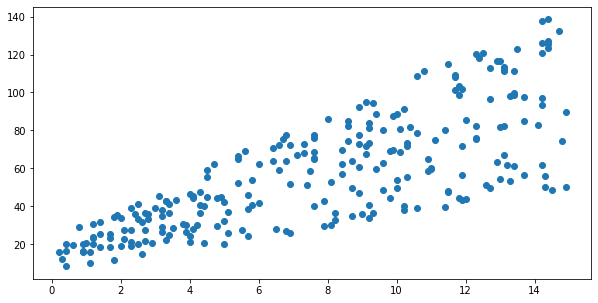

In [248]:
wage = pd.DataFrame()
years = list(np.random.randint(1,150,size =250)/10)
college = list(np.random.randint(0,3,size =250))
error = list(np.random.rand(250))
wage['years'] = years
wage['college'] = college
wage['error'] = error
wage['wage'] = 5 + 3*wage['years'] + 4*wage['college'] + 2*wage['years']*wage['college'] +12*wage['error']+wage['error']*wage['years']
plt.figure(figsize=(10,5))
plt.scatter(wage['years'],wage['wage'])

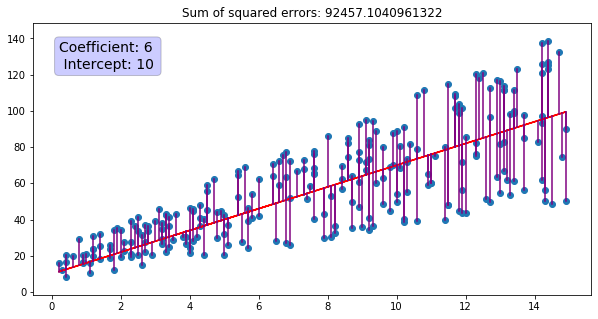

In [283]:
cost_function_sse(wage['years'],wage['wage'],6,10)

In [5]:
def cost_function_multi_hue(df,x1,x2,y):
    ymin = min(df[y])-10
    ymax = max(df[y])+10

    
    plt.figure(figsize=(10,5))
    plt.ylim(ymin,ymax)
    
    for value in df[x2].unique():
        x = np.array(df[df[x2]==value][x1]).reshape(-1,1)
        output = np.array(df[df[x2]==value][y]).reshape(-1,1)
        plt.scatter(x,output)
        lr = LinearRegression()
        lr.fit(x,output)
        coeff = lr.coef_[0]
        intercept = lr.intercept_[0]
        xx = np.linspace(0,14,25)
        yy = xx*coeff + intercept
        plt.plot(xx,yy,c='r')

    


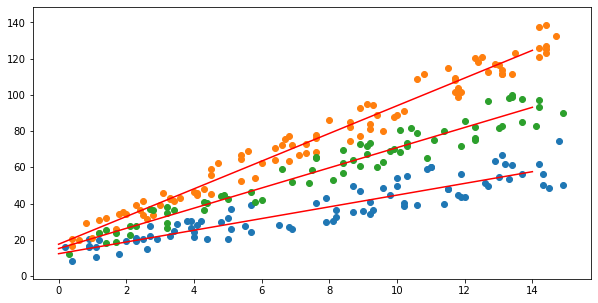

In [281]:
cost_function_multi_hue(wage,'years','college','wage')

In [15]:
x_class, y_class = make_classification(n_samples=50,n_features=1,n_informative=1,n_redundant=0,
                                       n_classes=2,n_clusters_per_class=1,class_sep=.5,random_state=3)

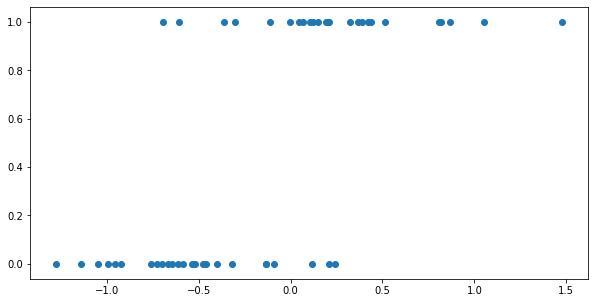

In [26]:
plt.figure(figsize=(10,5))
plt.scatter(x_class,y_class)

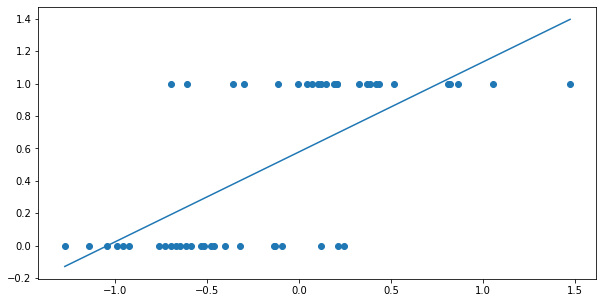

In [33]:
lr = LinearRegression()
lr.fit(x_class,y_class)

xx = np.linspace(min(x_class),max(x_class),100).reshape(-1,1)
coeff = lr.coef_[0]
intercept = lr.intercept_
yy = xx*coeff + intercept
plt.figure(figsize=(10,5))
plt.scatter(x_class,y_class)
plt.plot(xx,yy)

In [17]:
log = LogisticRegression()
log.fit(x_class,y_class)
[prob[1] for prob in log.predict_proba([[.5],[.1],[.2]])]

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0.8098834006106144, 0.6325083464326872, 0.6834252265751025]

In [24]:
def classification_visual(x,y):
    lr = LogisticRegression()
    lr.fit(x,y)
    xx = np.linspace(min(x),max(x),100).reshape(-1,1)
    yy = [prob[1] for prob in lr.predict_proba(xx)]
    
    plt.figure(figsize=(10,5))
    plt.scatter(x,y)
    plt.plot(xx,yy)


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


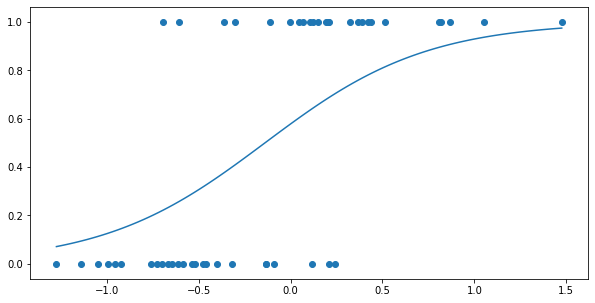

In [25]:
classification_visual(x_class,y_class)